In [63]:
!pip install fiona

In [64]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

import os
import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['indicators', 'countries', 'rivers', 'cities']

In [65]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

In [66]:
# prompt: quiero proyectar countries, rives, cities e indicators

print(countries.head())
print(rivers.head())
print(cities.head())
print(indicators.head())

               COUNTRY                                           geometry
0  Aruba (Netherlands)  MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  MULTIPOLYGON (((61.27656 35.60725, 61.29638 35...
3              Algeria  MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...
        NAME  SYSTEM                                           geometry
0      Aldan    Lena  MULTILINESTRING ((124.00678 56.47258, 123.2595...
1     Amazon  Amazon  MULTILINESTRING ((-61.2773 -3.60706, -60.68466...
2  Amu Darya    None  MULTILINESTRING ((73.98818 37.49952, 73.52595 ...
3       Amur    None  MULTILINESTRING ((122.63956 49.9973, 120.47874...
4     Angara    None  MULTILINESTRING ((105.07841 51.93053, 103.9295...
               NAME COUNTRY CAPITAL                   geometry
0          Murmansk  Russia       N  POINT (33.08604 68.96355

### Exercise 1
<div class="alert-success">

You will make two maps:
1. Plot your country as the background. Use **cx** to plot some **points** (the cities, airports, etc.) below the centroid.
2. Plot your country as the background. Select with **cx** all the first administrative divisions above the centroid. Then, use clip to show some **lines** (rivers, railroads, etc) that cross those divisions.
    
</div>

In [67]:
india = countries[countries.COUNTRY=='India']

In [68]:
citiesIndia_clipped = gpd.clip(gdf=cities,
                          mask=india)
riversIndia_clipped = gpd.clip(gdf=rivers,
                               mask=india)

In [69]:
india_7755=india.to_crs(7755)

rivers_india_7755=riversIndia_clipped.to_crs(india_7755.crs)
cities_india_7755=citiesIndia_clipped.to_crs(india_7755.crs)

In [70]:
india_7755.centroid

104    POINT (3955049.307 3862608.372)
dtype: geometry

In [71]:
citiesbelow = cities_india_7755.cx[:3955049.307 ,:3862608.372]

In [72]:
riversabove = rivers_india_7755.cx[3955049.307: ,3862608.372:]

<Axes: >

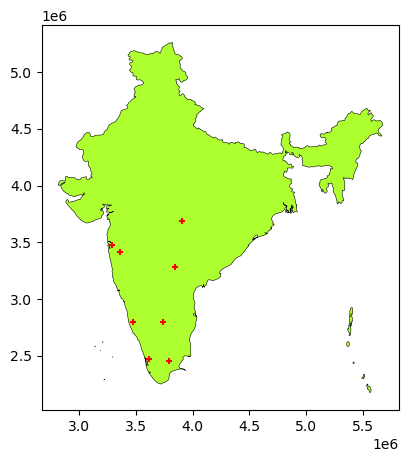

In [73]:
base = india_7755.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesbelow.plot(marker='+', color='red', markersize=15,
                    ax=base)

<Axes: >

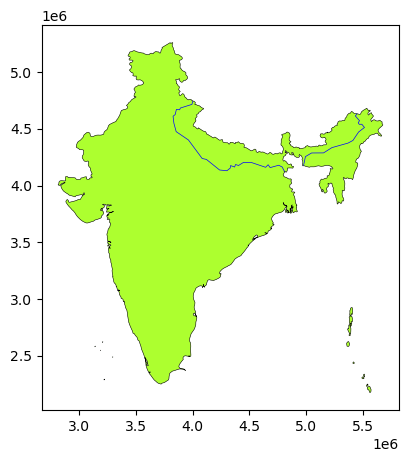

In [74]:
base = india_7755.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
riversabove.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

## Exercise 2


<div class="alert-success">

1. Create some subset of polygons with your country data at the municipal (or similar level). Use Unary UNION with those  polygons, and create a geoDF with the result.
2. Dissolve your municipalities by another higher level administrative level. Plot the result.
3. If possible, color some areas of your country by aggregating; if not, plot the "median" values in the _indicators_ map.
    
</div>

In [114]:
Link = 'https://github.com/alonso-mendoza/introgeodf/raw/refs/heads/main/maps/indiaMaps_7755.gpkg'

listlayers(Link)

['country', 'cities', 'rivers', 'centroid', 'airports', 'states']

<Axes: >

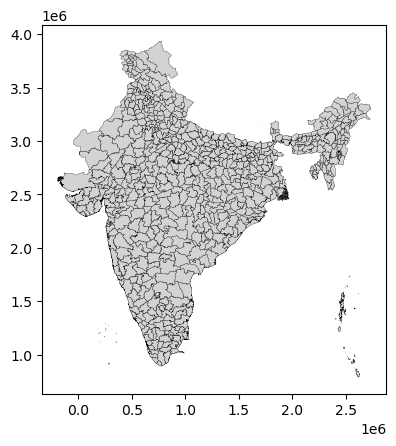

In [119]:
india_states=gpd.read_file(Link,layer='states')
india_states.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [120]:
india_states.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Nicobar Islands,IN.AN.NI,0,None,District,District,None,None,"MULTIPOLYGON (((2484441.133 1072561.22, 248457..."
1,105,IND,India,1,Andaman and Nicobar,2,North and Middle Andaman,IN.AN.NM,0,None,District,District,None,None,"MULTIPOLYGON (((2536990.771 1738827.541, 25370..."
2,105,IND,India,1,Andaman and Nicobar,3,South Andaman,IN.AN.SA,0,None,District,District,None,None,"MULTIPOLYGON (((2582977.096 1437121.449, 25852..."
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,IN.AD.AN,0,None,District,District,None,"Anantpur, Ananthapur","MULTIPOLYGON (((789049.335 1679600.779, 789459..."
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,IN.AD.CH,0,None,District,District,None,Chitoor|Chittor,"MULTIPOLYGON (((875695.591 1543484.297, 876352..."


In [121]:
len(india_states.NAME_1)

667

In [122]:
len(set(india_states.NAME_1))

36

<Axes: >

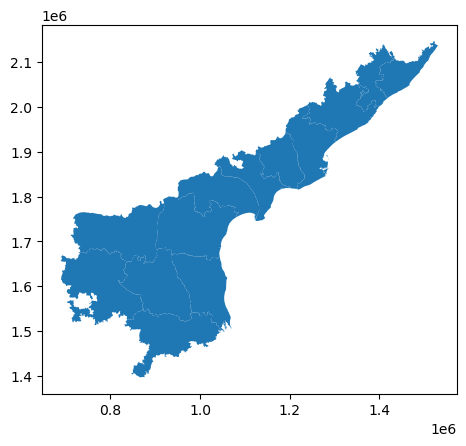

In [123]:
india_states[india_states.NAME_1=='Andhra Pradesh'].plot()

In [124]:
!pip show shapely

Name: shapely
Version: 2.0.6
Summary: Manipulation and analysis of geometric objects
Home-page: 
Author: Sean Gillies
Author-email: 
License: BSD 3-Clause
Location: C:\Users\OMEN\anaconda3\envs\dataEspacial_311\Lib\site-packages
Requires: numpy
Required-by: geopandas


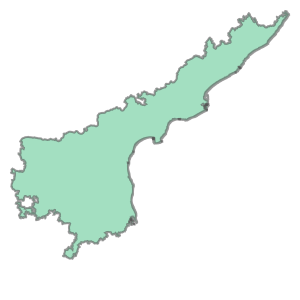

In [125]:
india_states[india_states.NAME_1=='Andhra Pradesh'].union_all()

In [126]:
AndhraPradesh_union=india_states[india_states.NAME_1=='Andhra Pradesh'].union_all()

In [127]:
type(AndhraPradesh_union)

shapely.geometry.multipolygon.MultiPolygon

In [128]:
gpd.GeoDataFrame(index=[0],data={'NAME_1':'Andhra Pradesh'},
                 crs=india_states.crs,
                 geometry=[AndhraPradesh_union])

,NAME_1,geometry
0,Andhra Pradesh,"MULTIPOLYGON (((1043909.395 1665486.707, 10439..."


<Axes: >

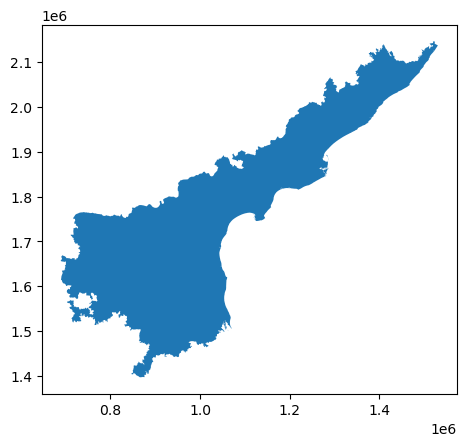

In [129]:
india_states[india_states.NAME_1=='Andhra Pradesh'].dissolve().plot()

In [130]:
AndhraPradesh_dissolve=india_states[india_states.NAME_1=='Andhra Pradesh'].dissolve()

type(AndhraPradesh_dissolve)

geopandas.geodataframe.GeoDataFrame

In [131]:
AndhraPradesh_dissolve

,geometry,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2
0,"MULTIPOLYGON (((1043909.395 1665486.707, 10439...",105,IND,India,2,Andhra Pradesh,4,Anantapur,IN.AD.AN,0,None,District,District,None,"Anantpur, Ananthapur"


In [132]:
AndhraPradesh_dissolve.drop(columns=['NAME_2','HASC_2','CCN_2','CCA_2','TYPE_2','ENGTYPE_2','NL_NAME_2','VARNAME_2'],inplace=True)

AndhraPradesh_dissolve

,geometry,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2
0,"MULTIPOLYGON (((1043909.395 1665486.707, 10439...",105,IND,India,2,Andhra Pradesh,4


<Axes: >

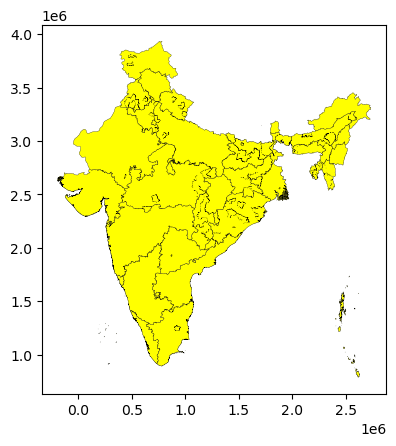

In [133]:
india_states.dissolve(by='NAME_1').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

In [134]:
india_diss=india_states.dissolve(by='NAME_1')

In [135]:
india_diss

,geometry,ID_0,ISO,NAME_0,ID_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2
NAME_1,,,,,,,,,,,,,,
Andaman and Nicobar,"MULTIPOLYGON (((2440676.316 1218490.959, 24406...",105,IND,India,1,1,Nicobar Islands,IN.AN.NI,0,None,District,District,None,None
Andhra Pradesh,"MULTIPOLYGON (((1043909.395 1665486.707, 10439...",105,IND,India,2,4,Anantapur,IN.AD.AN,0,None,District,District,None,"Anantpur, Ananthapur"
Arunachal Pradesh,"POLYGON ((2326876.361 3115449.201, 2323156.804...",105,IND,India,3,17,Anjaw,IN.AR.AJ,0,None,District,District,None,Lohit Frontier Division
Assam,"MULTIPOLYGON (((2005284.039 2907253.611, 20055...",105,IND,India,4,35,Baksa,IN.AS.BK,0,None,District,District,None,"Kampur, Ramrup"
Bihar,"MULTIPOLYGON (((1550902.77 2752332.239, 155026...",105,IND,India,5,62,Araria,IN.BR.AR,0,None,District,District,None,Bhagaipur
Chandigarh,"POLYGON ((672712.762 3395024.698, 671903.523 3...",105,IND,India,6,100,Chandigarh,IN.CH.CH,0,None,District,District,None,None
Chhattisgarh,"POLYGON ((1133703.074 1996301.488, 1133424.411...",105,IND,India,7,101,Baloda Bazar,IN.CT.BP,0,None,District,District,None,Baster
Dadra and Nagar Haveli,"POLYGON ((293465.795 2223361.565, 292940.246 2...",105,IND,India,8,128,Dadra and Nagar Haveli,IN.DN.DN,0,None,District,District,None,None
Daman and Diu,"MULTIPOLYGON (((278710.017 2253937.145, 278224...",105,IND,India,9,129,Daman,IN.DD.DA,0,None,District,District,None,None


In [136]:
india_diss.drop(columns=['NAME_2','HASC_2','CCN_2','CCA_2','TYPE_2','ENGTYPE_2','NL_NAME_2','VARNAME_2'],inplace=True)
india_diss.reset_index(inplace=True)
india_diss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME_1    36 non-null     object  
 1   geometry  36 non-null     geometry
 2   ID_0      36 non-null     int64   
 3   ISO       36 non-null     object  
 4   NAME_0    36 non-null     object  
 5   ID_1      36 non-null     int64   
 6   ID_2      36 non-null     int64   
dtypes: geometry(1), int64(3), object(3)
memory usage: 2.1+ KB


In [137]:
indicators.head()

,COUNTRY,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat,geometry
0,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018,-0.530113,1,1_Good,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
1,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018,1.827146,4,4_Poor,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018,0.304520,3,3_Bad,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
3,AZERBAIJAN,The Republic of Azerbaijan,.az,AZ,AZE,2019,73.2,35389000.0,2019,MIDDLE EAST,0.02,2018,0.233695,2,2_Middle,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
4,ALBANIA,The Republic of Albania,.al,AL,ALB,2019,58.9,3794000.0,2019,EUROPE,0.18,2018,-0.424447,1,1_Good,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."


In [138]:
indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["median"],
         "co2": ["median"],
         "ForestRev_gdp": ["median"]
     },as_index=False,
 )

,region,geometry,"(COUNTRY, count)","(fragility, median)","(co2, median)","(ForestRev_gdp, median)"
0,AFRICA,"MULTIPOLYGON (((-2.92813 5.10022, -2.93222 5.1...",51,87.40,4444000.0,2.470
1,AUSTRALIA AND OCEANIA,"MULTIPOLYGON (((-176.51779 -43.90778, -176.532...",6,67.95,1023000.0,0.385
2,CENTRAL AMERICA AND THE CARIBBEAN,"MULTIPOLYGON (((-81.71556 7.44681, -81.71362 7...",16,61.00,7873500.0,0.115
3,CENTRAL ASIA,"MULTIPOLYGON (((50.03472 45.04833, 50.0425 45....",6,75.20,106001000.0,0.005
4,EAST AND SOUTHEAST ASIA,"MULTIPOLYGON (((105.26361 -6.54472, 105.26138 ...",15,70.40,238983000.0,0.180
5,EUROPE,"MULTIPOLYGON (((-18.13223 27.77264, -18.1132 2...",39,40.50,38739000.0,0.150
6,MIDDLE EAST,"MULTIPOLYGON (((42.76819 14.06653, 42.7868 14....",16,72.60,68706500.0,0.000
7,NORTH AMERICA,"MULTIPOLYGON (((-155.211 20.00166, -155.18335 ...",3,38.00,612084000.0,0.080
8,SOUTH AMERICA,"MULTIPOLYGON (((-74.93431 -51.85501, -74.93251...",11,68.20,36051000.0,0.490
9,SOUTH ASIA,"MULTIPOLYGON (((73.10193 -0.58431, 73.09915 -0...",8,84.35,15916000.0,0.120


<Axes: >

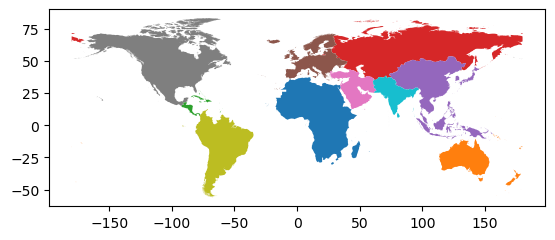

In [139]:
indicatorsByRegion=indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["median"],
         "co2": ["median"],
         "ForestRev_gdp": ["median"]
     },as_index=False,
 )


indicatorsByRegion.plot(column = 'region')

<Axes: >

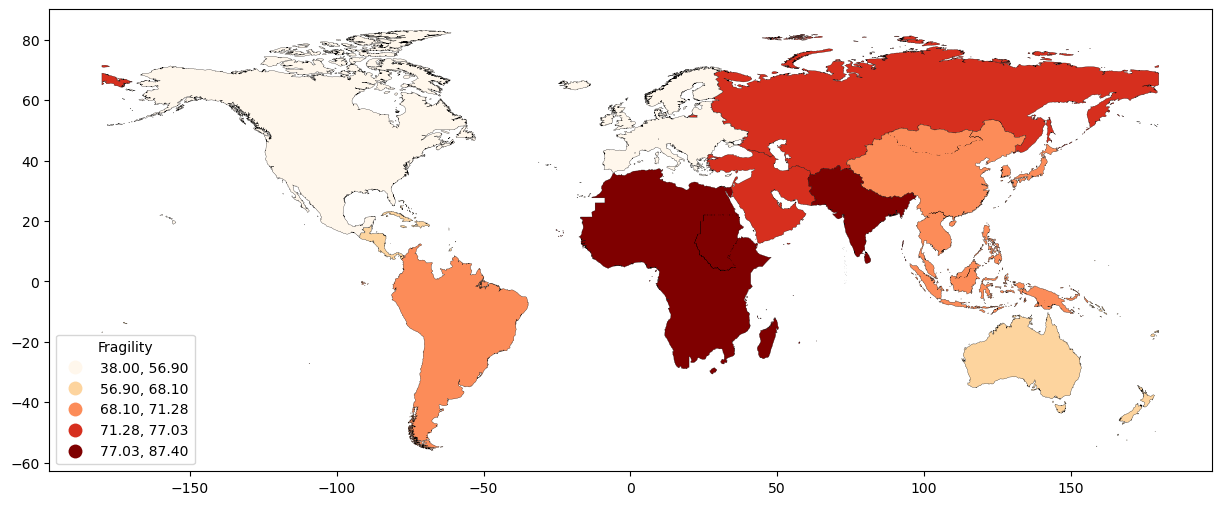

In [140]:
indicatorsByRegion.plot(column =('fragility', 'median'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Fragility",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

<Axes: >

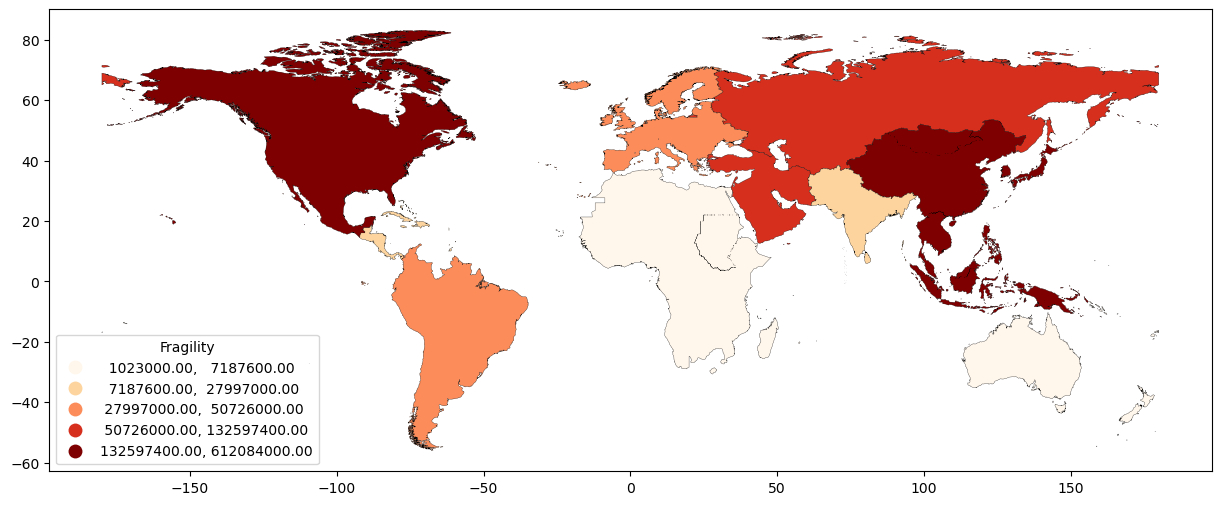

In [141]:
indicatorsByRegion.plot(column =('co2', 'median'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Fragility",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

<Axes: >

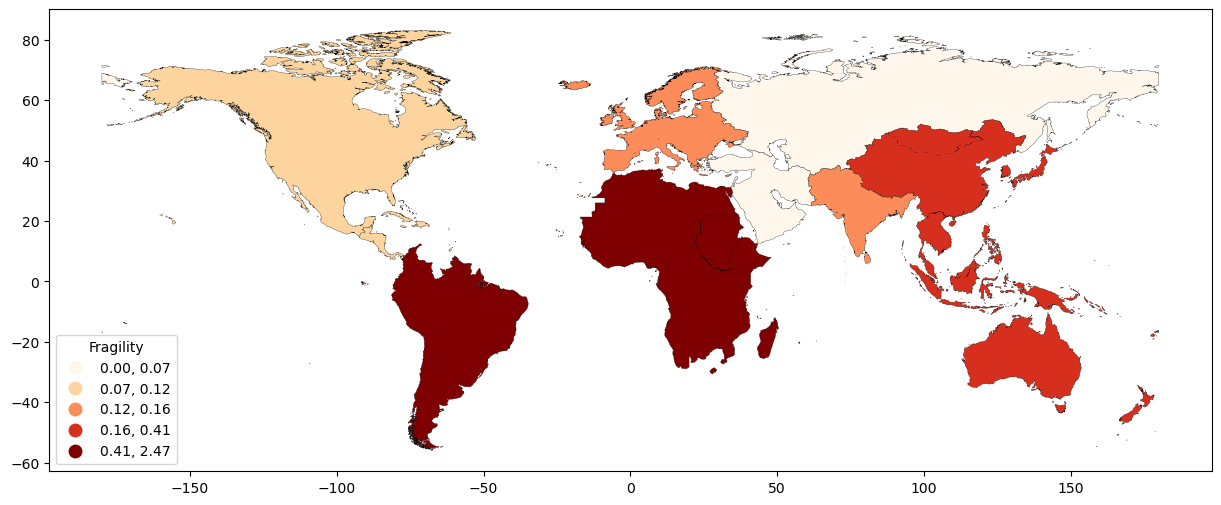

In [142]:
indicatorsByRegion.plot(column =('ForestRev_gdp', 'median'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Fragility",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

## Exercise 3


<div class="alert-success">

1. Select some points from your maps.
2. Create the convex hull for those points.
3. Turn the hull into a GDF.
4. Plot the hull on top of the country.
    
</div>

In [143]:
india_7755=gpd.read_file(Link,layer='country')
india_7755.centroid

0    POINT (3955049.307 3862608.372)
dtype: geometry

In [144]:
india_7755.centroid.x.values[0],india_7755.centroid.y.values[0]

(np.float64(3955049.3071499947), np.float64(3862608.372164335))

In [145]:
airports_7755=gpd.read_file(Link,layer='airports')
airports_7755.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,municipality,geometry
0,Helipad,heliport,29.946754,79.903173,NaN,Kedareshwar,POINT (3990784.292 4647272.746)
1,Siachen Base Camp Heliport,heliport,35.194275,77.213051,11693.0,Nubra,POINT (3746184.221 5227184.684)
2,Tawang Air Force Station,heliport,27.588732,91.877439,8756.0,Tawang,POINT (5150775.399 4438629.284)
3,Daulat Beg Oldi Advanced Landing Ground,small_airport,35.396467,77.928965,16200.0,Nubra,POINT (3811709.014 5248500.57)
4,Leh Heliport,heliport,34.129295,77.537205,10682.0,Leh,POINT (3773641.362 5108719.621)


In [148]:
# coordinates
centroidX,centroidY=india_7755.centroid.x.values[0],india_7755.centroid.y.values[0]

# subsets of medium airports
India_AirTopLeft=airports_7755[airports_7755.kind=='heliport'].cx[:centroidX,centroidY:]
India_AirTopRight=airports_7755[airports_7755.kind=='heliport'].cx[centroidX:,centroidY:]
India_AirBottomLeft=airports_7755[airports_7755.kind=='heliport'].cx[:centroidX,:centroidY]
India_AirBottomRight=airports_7755[airports_7755.kind=='heliport'].cx[centroidX:,:centroidY]

<Axes: >

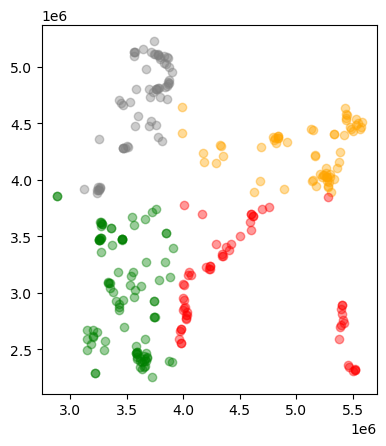

In [149]:
base=India_AirTopLeft.plot(facecolor='grey', alpha=0.4)
India_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
India_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
India_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

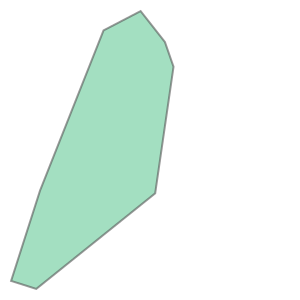

In [160]:
India_AirTopLeft.union_all().convex_hull

In [164]:
hull_geom = India_AirTopLeft.union_all().convex_hull

In [165]:
Heliport_hull = gpd.GeoDataFrame(index=[0],
                                  crs=India_AirTopLeft.crs,
                                  geometry=[hull_geom])

Heliport_hull

,geometry
0,"POLYGON ((3240611.819 3881420.071, 3118872.174..."


<Axes: >

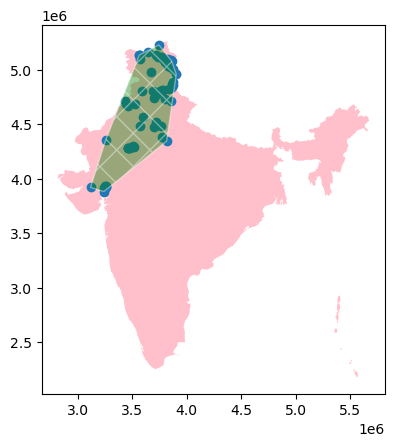

In [169]:
base=india_7755.plot(facecolor='pink')
India_AirTopLeft.plot(ax=base)
Heliport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

## Exercise 4


<div class="alert-success">

Apply two spatial overlays to your maps. If possible. If not, try the codes below.
    
</div>

In [201]:
india_union = india_states.union_all()
india_centroid = india_union.centroid

In [202]:
x, y = india_centroid.x, india_centroid.y

In [203]:
# the north
StatesN_india=india_states.cx[:,y:]
# the south
StatesS_india=india_states.cx[:,:y]
# the west
StatesW_india=india_states.cx[:x,:]
# the east
StatesE_india=india_states.cx[x:,:]

<Axes: >

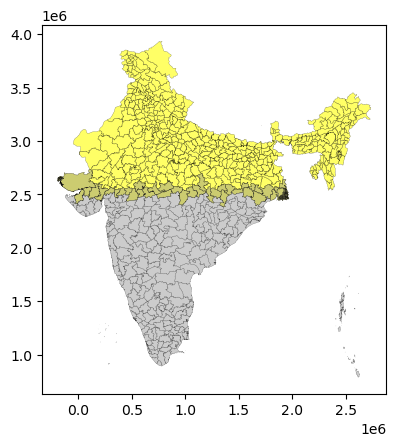

In [204]:
base=StatesN_india.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
StatesS_india.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

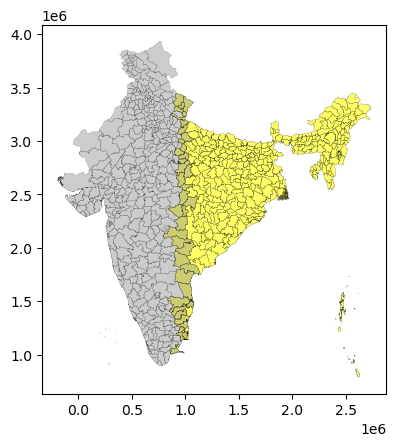

In [205]:
base=StatesE_india.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
StatesW_india.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

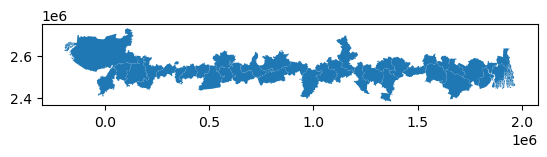

In [206]:
StatesNS=StatesN_india.overlay(StatesS_india, how="intersection",keep_geom_type=True)
StatesNS.plot()

<Axes: >

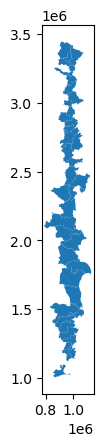

In [207]:
StatesWE=StatesW_india.overlay(StatesE_india, how="intersection",keep_geom_type=True)
StatesWE.plot()

In [211]:
StatesWE.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID_0_1       65 non-null     int64   
 1   ISO_1        65 non-null     object  
 2   NAME_0_1     65 non-null     object  
 3   ID_1_1       65 non-null     int64   
 4   NAME_1_1     65 non-null     object  
 5   ID_2_1       65 non-null     int64   
 6   NAME_2_1     65 non-null     object  
 7   HASC_2_1     65 non-null     object  
 8   CCN_2_1      65 non-null     int64   
 9   CCA_2_1      0 non-null      object  
 10  TYPE_2_1     65 non-null     object  
 11  ENGTYPE_2_1  65 non-null     object  
 12  NL_NAME_2_1  0 non-null      object  
 13  VARNAME_2_1  13 non-null     object  
 14  ID_0_2       65 non-null     int64   
 15  ISO_2        65 non-null     object  
 16  NAME_0_2     65 non-null     object  
 17  ID_1_2       65 non-null     int64   
 18  NAME_1_2     65 non-null

In [210]:
StatesNS.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID_0_1       71 non-null     int64   
 1   ISO_1        71 non-null     object  
 2   NAME_0_1     71 non-null     object  
 3   ID_1_1       71 non-null     int64   
 4   NAME_1_1     71 non-null     object  
 5   ID_2_1       71 non-null     int64   
 6   NAME_2_1     71 non-null     object  
 7   HASC_2_1     70 non-null     object  
 8   CCN_2_1      71 non-null     int64   
 9   CCA_2_1      0 non-null      object  
 10  TYPE_2_1     71 non-null     object  
 11  ENGTYPE_2_1  71 non-null     object  
 12  NL_NAME_2_1  0 non-null      object  
 13  VARNAME_2_1  20 non-null     object  
 14  ID_0_2       71 non-null     int64   
 15  ISO_2        71 non-null     object  
 16  NAME_0_2     71 non-null     object  
 17  ID_1_2       71 non-null     int64   
 18  NAME_1_2     71 non-null

In [212]:
StatesWE.head()

,ID_0_1,ISO_1,NAME_0_1,ID_1_1,NAME_1_1,ID_2_1,NAME_2_1,HASC_2_1,CCN_2_1,CCA_2_1,...,ID_2_2,NAME_2_2,HASC_2_2,CCN_2_2,CCA_2_2,TYPE_2_2,ENGTYPE_2_2,NL_NAME_2_2,VARNAME_2_2,geometry
0,105,IND,India,2,Andhra Pradesh,5,Chittoor,IN.AD.CH,0,None,...,5,Chittoor,IN.AD.CH,0,None,District,District,None,Chitoor|Chittor,"POLYGON ((876352.042 1542748.215, 876820.288 1..."
1,105,IND,India,2,Andhra Pradesh,7,Guntur,IN.AD.GU,0,None,...,7,Guntur,IN.AD.GU,0,None,District,District,None,None,"MULTIPOLYGON (((1120124.31 1759475.804, 112015..."
2,105,IND,India,2,Andhra Pradesh,10,Nellore,IN.AD.NE,0,None,...,10,Nellore,IN.AD.NE,0,None,District,District,None,None,"MULTIPOLYGON (((1062591.704 1500659.82, 106271..."
3,105,IND,India,2,Andhra Pradesh,11,Prakasam,IN.AD.PR,0,None,...,11,Prakasam,IN.AD.PR,0,None,District,District,None,None,"MULTIPOLYGON (((1044079.239 1686711.473, 10441..."
4,105,IND,India,19,Madhya Pradesh,294,Balaghat,IN.MP.BL,0,None,...,294,Balaghat,IN.MP.BL,0,None,District,District,None,None,"POLYGON ((1101601.933 2486802.723, 1101725.534..."


In [213]:
keep=['NAME_0_1','NAME_1_1','NAME_2_1','geometry']
StatesWE=StatesWE.loc[:,keep]
StatesNS=StatesNS.loc[:,keep]

<Axes: >

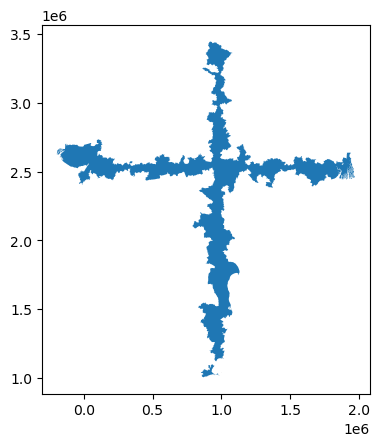

In [217]:
StatesNS.overlay(StatesWE, how="union",keep_geom_type=True).dissolve().plot()

In [218]:
StatesMid=StatesNS.overlay(StatesWE, how="union",keep_geom_type=True).dissolve()
StatesMid

,geometry,NAME_0_1_1,NAME_1_1_1,NAME_2_1_1,NAME_0_1_2,NAME_1_1_2,NAME_2_1_2
0,"MULTIPOLYGON (((49913.899 2509576.475, 49426.9...",India,Madhya Pradesh,Dindori,India,Madhya Pradesh,Balaghat


In [219]:
StatesMid['zone']='middles'
StatesMid=StatesMid.loc[:,['NAME_0_1_1','zone','geometry']]
StatesMid

,NAME_0_1_1,zone,geometry
0,India,middles,"MULTIPOLYGON (((49913.899 2509576.475, 49426.9..."


<Axes: >

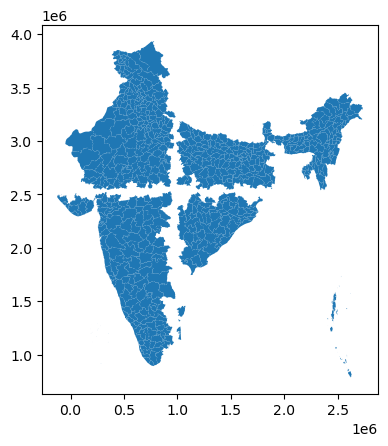

In [221]:
india_states.overlay(StatesMid, how='difference').plot()

<Axes: >

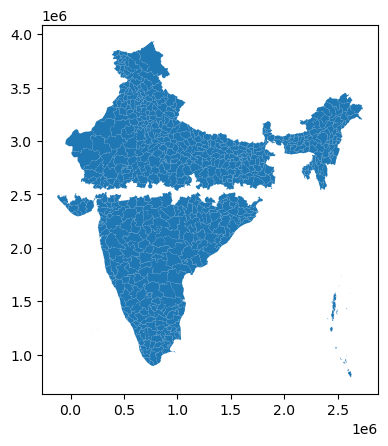

In [222]:
StatesN_india.overlay(StatesS_india, how="symmetric_difference",keep_geom_type=True).plot()

<Axes: >

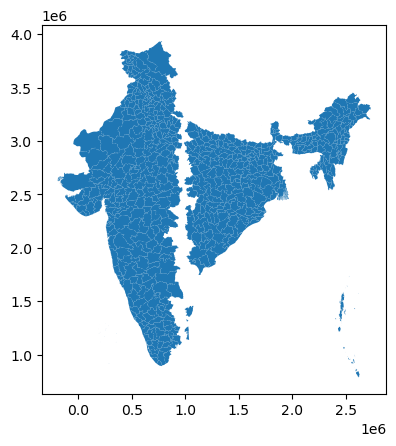

In [223]:
StatesW_india.overlay(StatesE_india, how="symmetric_difference",keep_geom_type=True).plot()